In [405]:
#import libraries

import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In [78]:
df = pd.read_csv("all_fixation_data_cleaned_up.csv", encoding='latin1', delim_whitespace=True)
df

,Timestamp,StimuliName,FixationIndex,FixationDuration,MappedFixationPointX,MappedFixationPointY,user,description
0,2586,01_Antwerpen_S1.jpg,9,250,1151,458,p1,color
1,2836,01_Antwerpen_S1.jpg,10,150,1371,316,p1,color
2,2986,01_Antwerpen_S1.jpg,11,283,1342,287,p1,color
3,3269,01_Antwerpen_S1.jpg,12,433,762,303,p1,color
4,3702,01_Antwerpen_S1.jpg,13,183,624,297,p1,color
...,...,...,...,...,...,...,...,...
118121,443521,01b_Antwerpen_S2.jpg,1158,250,1000,470,p9,gray
118122,443771,01b_Antwerpen_S2.jpg,1159,216,1049,225,p9,gray
118123,443988,01b_Antwerpen_S2.jpg,1160,216,1188,60,p9,gray
118124,444204,01b_Antwerpen_S2.jpg,1161,167,1107,3,p9,gray


In [97]:
def get_data_user(user_name, name_map):
    data_user = df.loc[df['user'] == user_name]
    data_user = data_user.loc[data_user['StimuliName'] == name_map]
    return data_user

In [80]:
def get_array_fixations(user_name, name_map):
    data_user = get_data_user(user_name, name_map)
    array_fixations_x = get_x_fixation(user_name, name_map)
    array_fixations_y = get_y_fixation(user_name, name_map)
    array_fixation_duration = get_duration_fixation(user_name, name_map)
    array_fixations = []
    for l in range(len(array_fixations_x)):
        array_fixations.append([array_fixations_x[l],array_fixations_y[l], array_fixation_duration[l]])
    return array_fixations

In [81]:
def get_x_fixation(user_name, name_map):
    data_user = get_data_user(user_name, name_map)
    array_fixations_x = []
    for i in data_user['MappedFixationPointX']:
        array_fixations_x.append(i)
    return array_fixations_x

In [82]:
def get_y_fixation(user_name, name_map):
    data_user = get_data_user(user_name, name_map)
    array_fixations_y = []
    for i in data_user['MappedFixationPointY']:
        array_fixations_y.append(i)
    return array_fixations_y

In [83]:
def get_duration_fixation(user_name, name_map):
    data_user = get_data_user(user_name, name_map)
    array_fixation_duration = []
    for i in data_user['FixationDuration']:
        array_fixation_duration.append(i)
    return array_fixation_duration

In [248]:
def get_cropped_images(user_name, name_map):
    my_file = os.path.join('stimuli', name_map)
    img = plt.imread(my_file)
    img = Image.fromarray(img)
    width, height = img.size
#     print(width, height)
    
    images=[]
    for i in get_array_fixations(user_name, name_map):
        x = i[0]-100
        y = i[1]-100
        w = i[0]+100
        h = i[1]+100
        area = (x, y, w, h)
        cropped_img = img.crop(area)
        images.append(cropped_img)
    return(images)

In [483]:
def draw_gaze_stripes(user_name, name_map):
    
    fig = plt.figure()
    fig.set_figwidth(80)
    plt.xlim(0, sum(get_duration_fixation(user_name, name_map)))
    plt.yticks([])
    plt.ylabel(user_name)
    plt.subplots_adjust(hspace=0,wspace=0)
    n=1
    for i in get_cropped_images(user_name, name_map):
        fig.add_subplot(1, len(get_cropped_images(user_name, name_map)), n)
        plt.yticks([])
        plt.xticks([])
        plt.imshow(i)
        n+=1 
    fig.subplots_adjust(bottom=0.5)
    plt.show()
    fig.savefig('gaze stripe' + name_map)

In [ ]:
get_cropped_images('p3', '17_Krakau_S2.jpg')

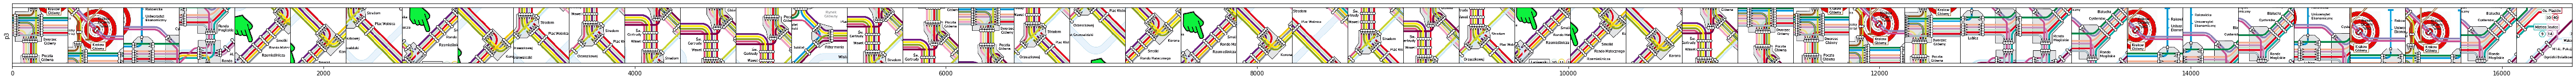

In [484]:
draw_gaze_stripes('p3', '17_Krakau_S2.jpg')